In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn import decomposition

In [3]:
# Load & normalize data
digits = load_digits()
X = digits['data']/255
Y = digits['target']

# 2. Non-negative matrix factorization vs. SVD comparison

## NMF

In [6]:
# Perform NMF factorization with function from library
nmf = decomposition.NMF(n_components=10)
W = nmf.fit_transform(X)
H = nmf.components_ # base vectors

## SVD

In [9]:
# center data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# SVD
U, S, V = np.linalg.svd(X_centered)
V = V + X_mean # Base vectors

In [16]:
def plot_matrix(M, rows=6, dim=(8,8)):
    "Helper function to plot base vectors"
    fig, axes = plt.subplots(rows//3, 3, figsize=(16,9))
    for i, ax in enumerate(axes.flat):
        ax.imshow(M[i].reshape(8,8))
    return fig

Text(0.5,0.98,'SVD')

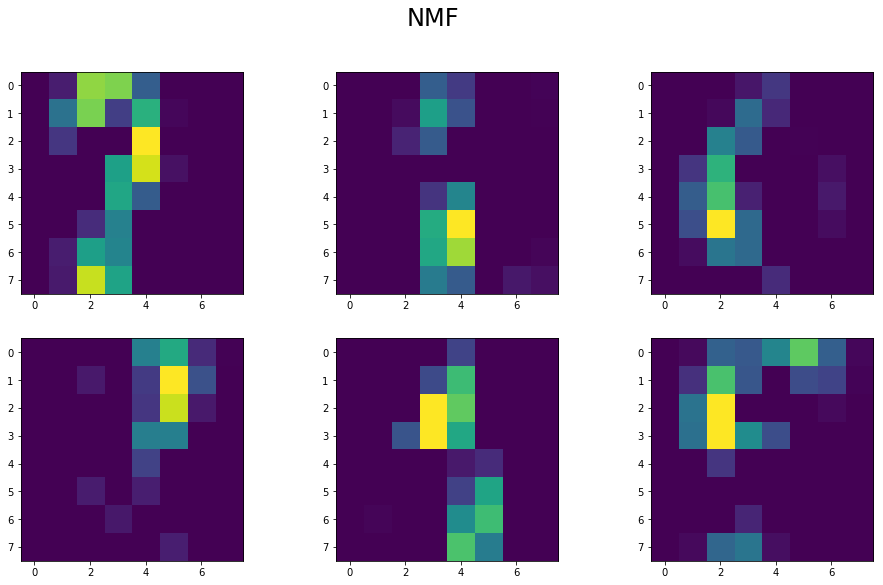

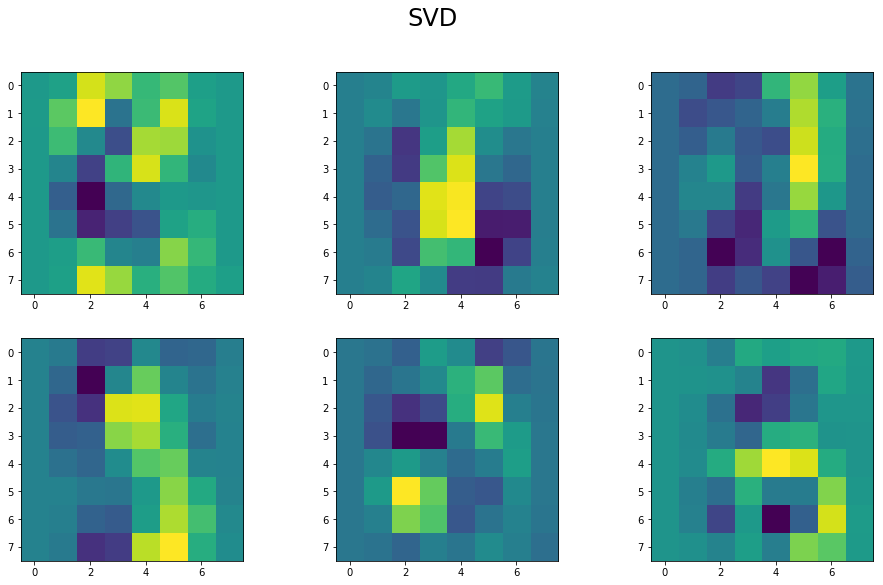

In [20]:
fig1 = plot_matrix(H)
fig1.suptitle('NMF', fontsize=24)
fig2 = plot_matrix(V)
fig2.suptitle("SVD", fontsize=24)

As we can see in the plots, the NMF and SVD methods factorize the data into very different base vectors. The NMF disassembles the data into clear segments, from which the digits can be then build back, while the SVD find the rough shapes of the digits and uses them to reconstruct the digits.